In [291]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import random

In [70]:
%matplotlib inline


In [71]:
iris = pd.read_csv('iris.csv')

In [72]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


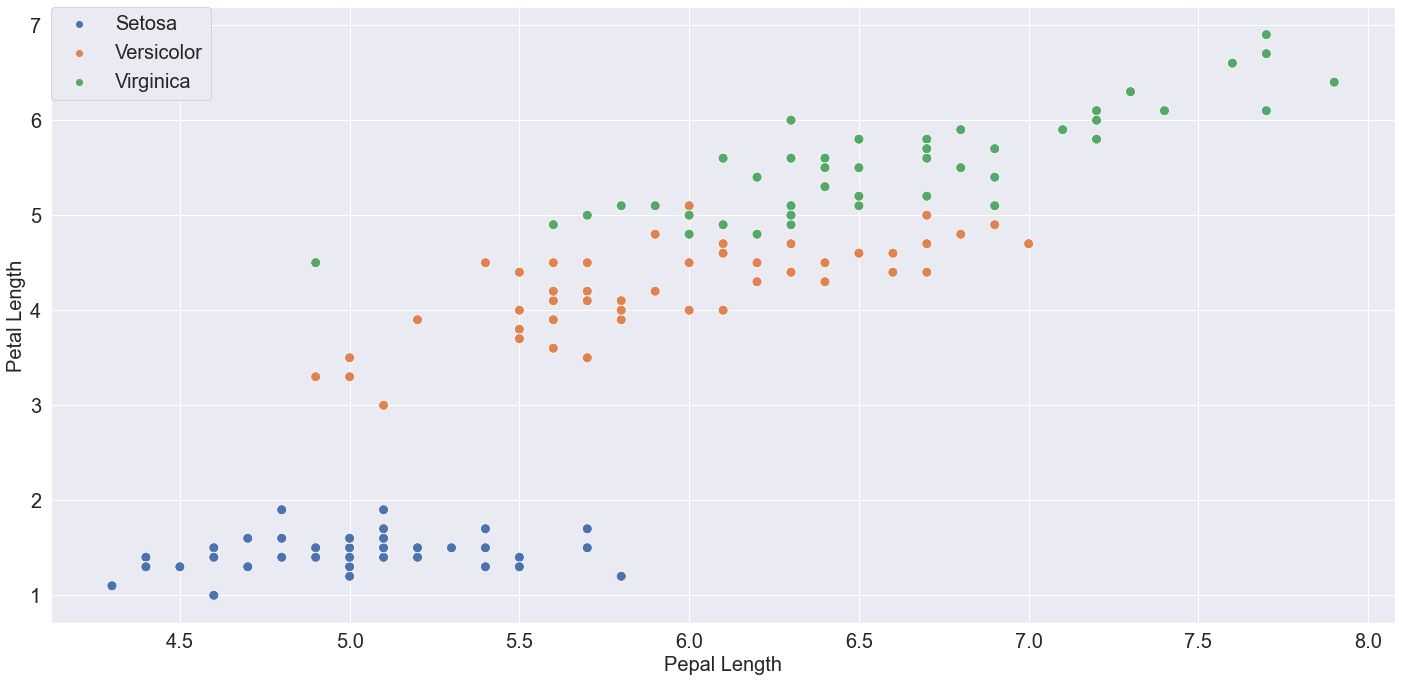

In [146]:
x1 = [iris['sepal.length'][15],iris['sepal.length'][99],iris['sepal.length'][107]]
y1 = [iris['petal.length'][15],iris['petal.length'][99],iris['petal.length'][107]]
plt.figure(figsize = (20, 10))
ax = sns.scatterplot(data=iris, x="sepal.length", y="petal.length", hue="variety",s=100)

plt.legend(fontsize=20,loc='upper left', borderaxespad=0)

plt.xlabel('Pepal Length',fontsize=20)
plt.ylabel('Petal Length',fontsize=20)
ax.tick_params(axis='x', labelsize= 20)
ax.tick_params(axis='y', labelsize= 20)
sns.set(font_scale = 2)




In [132]:
y1[0]

1.5

Text(6.1, 1.5, '(5.8,1.2)')

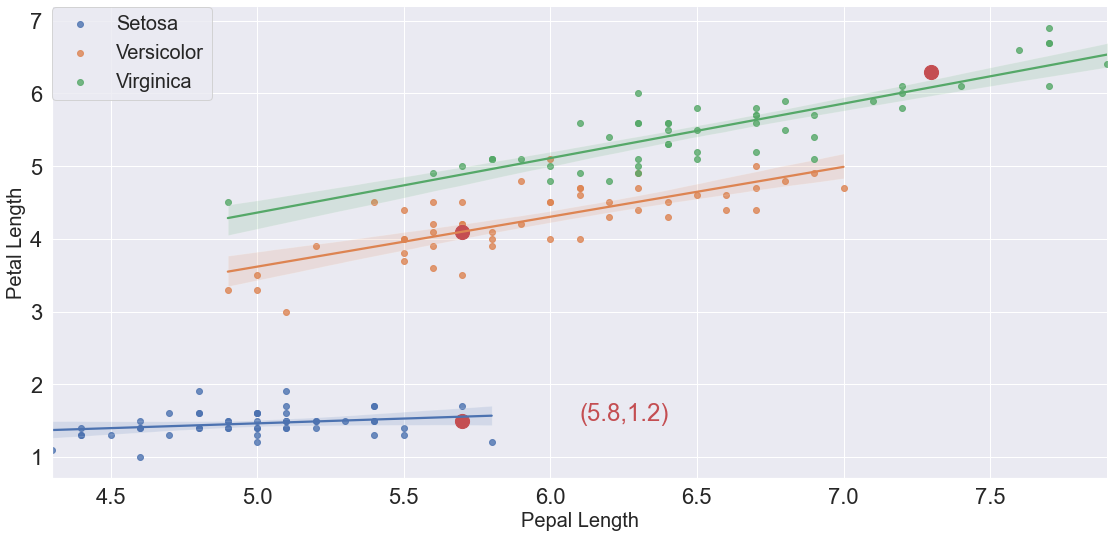

In [148]:
g = sns.lmplot(x="sepal.length", y="petal.length", hue="variety", data=iris,height=8,aspect=2,legend=False)

plt.legend(fontsize=20,loc='upper left', borderaxespad=0)
plt.xlabel('Pepal Length',fontsize=20)
plt.ylabel('Petal Length',fontsize=20)

sns.set(font_scale = 2)
plt.scatter(x=x1, y=y1,s = 200,color='r',marker='o')
plt.text(6.1,1.5,'(5.8,1.2)',color='r')


In [223]:
wtid = pd.read_csv('wtid-report.csv',index_col=False)


In [221]:
wtid.head()

,Country,Year,P99 income threshold,P99.5 income threshold,P99.9 income threshold
0,United States,1913,82677.22,135583.49,428630.39
1,United States,1914,76405.62,126910.52,410528.72
2,United States,1915,64409.44,122555.68,451668.29
3,United States,1916,77289.78,138102.28,518327.37
4,United States,1917,95326.69,154537.77,536356.49


In [216]:
d = {'Year':[wtid['Year']], 'P99' :[wtid['P99 income threshold']], 'P99.5':[wtid['P99.5 income threshold']],'P99.9':[wtid['P99.9 income threshold']]}

In [217]:
wtid = wtid[["Year", 'P99 income threshold','P99.5 income threshold','P99.9 income threshold']]

In [218]:
wtid.head()

,Year,P99 income threshold,P99.5 income threshold,P99.9 income threshold
0,1913,82677.22,135583.49,428630.39
1,1914,76405.62,126910.52,410528.72
2,1915,64409.44,122555.68,451668.29
3,1916,77289.78,138102.28,518327.37
4,1917,95326.69,154537.77,536356.49


In [229]:
P99_1993 = wtid[wtid['Year'] == 1993]
P99_1993 = P99_1993.iloc[: , 1:]

print('99th',P99_1993['P99 income threshold'])

99th 80    273534.87
Name: P99 income threshold, dtype: float64


In [329]:
diamonds = pd.read_csv('diamonds_small.csv',index_col=False)

In [328]:
np.shape(diamonds)

(53940, 2)

In [378]:
rows = np.shape(diamonds)[0]
model = LinearRegression()
x = diamonds['carat'].values
y = diamonds['price'].values

x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
print(model.intercept_, model.coef_, model.score(x, y))




-2256.334068128194 [7720.83327837] 0.8590363726794568


In [397]:
model.coef_[0]

7720.833278371715

In [399]:
##diamonds = diamonds.sample(n=2000, random_state=1)
m, n = 2000, 2

matrix = [[0] * n for i in range(m)]

In [400]:
diamonds1 = pd.read_csv('diamonds_small.csv',index_col=False)
i = 0
for i in range(m):
    diamonds = diamonds1.sample(n=3000)
    x = diamonds['carat'].values
    y = diamonds['price'].values
    x = x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    
    matrix[i] = [model.intercept_, model.coef_[0]]

               
               

In [401]:
columnnames = ['intercept','coefficient']
df = pd.DataFrame(matrix,columns = columnnames)

In [402]:
df.head()

,intercept,coefficient
0,-2191.730452,7648.076251
1,-2258.313120,7749.535239
2,-2156.727369,7610.272233
3,-2318.292995,7830.991955
4,-2275.410760,7816.820234


(array([  2.,   3.,   5.,   8.,  31.,  48.,  68., 140., 159., 205., 253.,
        269., 275., 207., 142.,  91.,  56.,  24.,   7.,   7.]),
 array([7365.32901613, 7400.79172703, 7436.25443793, 7471.71714883,
        7507.17985973, 7542.64257063, 7578.10528153, 7613.56799244,
        7649.03070334, 7684.49341424, 7719.95612514, 7755.41883604,
        7790.88154694, 7826.34425784, 7861.80696875, 7897.26967965,
        7932.73239055, 7968.19510145, 8003.65781235, 8039.12052325,
        8074.58323415]),
 <BarContainer object of 20 artists>)

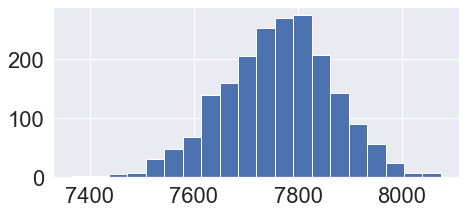

In [406]:
plt.hist(df['coefficient'],bins=20)